In [1]:
!git clone https://github.com/PiotrJZielinski/ml-throwdown-datasets

fatal: destination path 'ml-throwdown-datasets' already exists and is not an empty directory.


Zaczniemy od wygenerowania sztucznego zbioru do klasyfikacji, składającego się z dwóch zbiorów punktów z rozkładu normalnego.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# losowe dane dla dwóch klas, przy przesunięciu środka rozkładu
train_data = np.vstack((np.random.normal(size=(100, 2)),
                        np.random.normal(size=(100, 2), loc=2)))
train_labels = np.hstack((np.zeros(100), np.ones(100)))


Wyświetlimy je w postaci wykresu punktowego, wraz z linią dokładnie pomiędzy środkami obu rozkładów

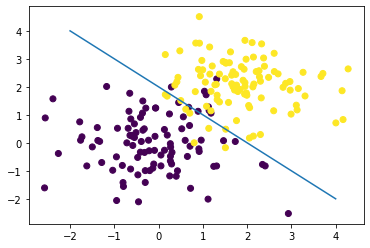

In [33]:
fig, ax = plt.subplots()
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels)
ax.plot(range(-2, 5), range(4, -3, -1))
plt.show()

Na tak utworzonym zbiorze wytrenujemy model regresji logistycznej

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_data, train_labels)

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Funkcja ta zwraca meshgrid (czyli listę indeksów punktów z zadanego przedziału) na podstawie wygenerowanego zbioru danych.

In [35]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


Dokonujemy predykcji oraz wyświetlamy wszystkie punkty pcolormeshem, żeby zobaczyć w jaki sposób regresja logistyczna dokonała podziału przestrzeni.

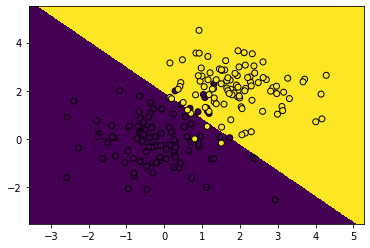

In [36]:
xs, ys = get_grid(train_data)

predicted = model.predict(
    np.column_stack((xs.flatten(),
                     ys.flatten()))).reshape(xs.shape)

fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, predicted)
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolors='k')
plt.show()

Zwróćmy uwagę na fakt, że jest tutaj linia prosta.

Przejdźmy teraz do wykorzystania trochę bardziej rzeczywistych danych - binarnych, gdyż takie problemy rozwiązuje regresja logistyczna.

In [37]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ml-throwdown-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'iris': {'class_column': 'species', 'index_col': None},
              'wine': {'class_column': 'Class', 'index_col': None},
              'glass': {'class_column': 'Type', 'index_col': 'ID'},
              'diabetes': {'class_column': 'Class', 'index_col': None}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes

In [38]:
X, y, classes = prepare_dataset('diabetes')

Dzielimy dataset na zbiory treningowy i testowy

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

Trenujemy model na danych treningowych

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(y_pred)
print(y_test.to_numpy())

[0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1
 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 1]
[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1
 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 1 1 1]


Jak widać ten sposób pokazywania wyników nie pozwala zbyt dobrze ocenić działania modelu, dlatego też wykorzystamy metryki klasyfikacji - zarówno dla zbioru treningowego, jak i testowego.

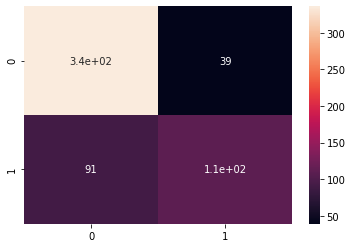

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True)

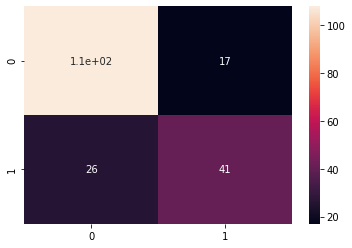

In [43]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

Możemy też obliczyć wartości pozostałych metryk klasyfikacji.

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.7743055555555556
Precision: 0.738255033557047
Recall: 0.5472636815920398
F1-Score: 0.6285714285714286


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.7760416666666666
Precision: 0.7068965517241379
Recall: 0.6119402985074627
F1-Score: 0.6559999999999999


Zgodnie z oczekiwaniami, wartości dla zbioru treningowego są nieco wyższe. Możemy jeszcze spróbować wyświetlić to w formie wykresu.

In [46]:
df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
melted = pd.melt(df.reset_index(), id_vars='index', var_name='metric')
melted

,index,metric,value
0,train,accuracy,0.774306
1,test,accuracy,0.776042
2,train,precision,0.738255
3,test,precision,0.706897
4,train,recall,0.547264
5,test,recall,0.611940
6,train,f1,0.628571
7,test,f1,0.656000


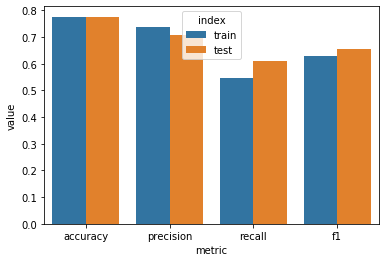

In [47]:
sns.barplot(x='metric', y='value', hue='index', data=melted)

Możemy też regresję logistyczną zastosować dla zbiorów o wielu etykietach. Stosujemy wówczas strategię One versus Rest (trenujemy tyle klasyfikatorów, ile mamy klas) - sklearn robi to automatycznie.

In [56]:
X, y, classes = prepare_dataset('iris')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [57]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(y_pred)
print(y_test.to_numpy())

[0 0 1 2 1 2 0 0 2 2 2 1 1 2 1 0 2 0 2 0 2 0 1 1 2 1 2 0 2 0 1 1 2 2 1 1 0
 0]
[0 0 1 2 1 2 0 0 2 2 2 1 1 1 1 0 2 0 2 0 2 0 1 1 2 1 2 0 2 0 1 1 2 2 1 1 0
 0]


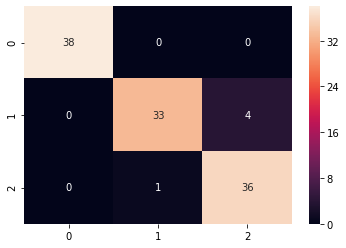

In [59]:
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True)

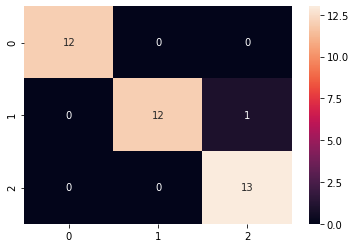

In [60]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
f1_train = f1_score(y_train, y_pred_train, average='micro')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.9553571428571429
Precision: 0.9553571428571429
Recall: 0.9553571428571429
F1-Score: 0.9553571428571429


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='micro')
recall_test = recall_score(y_test, y_pred, average='micro')
f1_test = f1_score(y_test, y_pred, average='micro')

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.9736842105263158
Precision: 0.9736842105263158
Recall: 0.9736842105263158
F1-Score: 0.9736842105263158


In [63]:
df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
melted = pd.melt(df.reset_index(), id_vars='index', var_name='metric')
melted

,index,metric,value
0,train,accuracy,0.955357
1,test,accuracy,0.973684
2,train,precision,0.955357
3,test,precision,0.973684
4,train,recall,0.955357
5,test,recall,0.973684
6,train,f1,0.955357
7,test,f1,0.973684


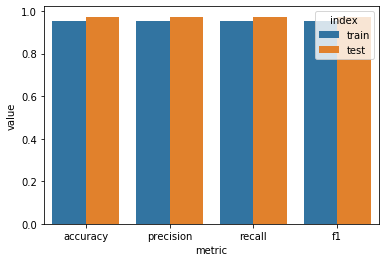

In [64]:
sns.barplot(x='metric', y='value', hue='index', data=melted)